In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
#Image enhancements: 
# Sometimes microscope images lack contrast, they appear to be washed out but they still contain information.
# (Show scratch assay and alloy images)
# We can mathematically process these images and make them look good,
#more importantly, get them ready for segmentation
#
#Histogram equalization is a good way to stretch the histogram and thus improve the image.  



In [8]:
img = cv2.imread("noisy_staff.jpg", 0)
equ = cv2.equalizeHist(img)

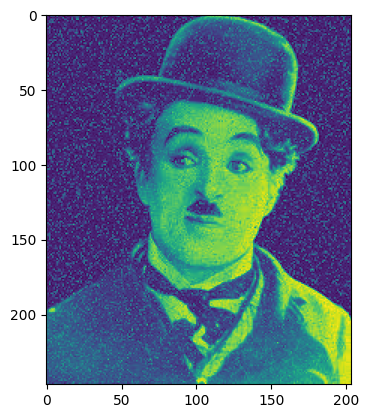

In [9]:

plt.imshow(img)

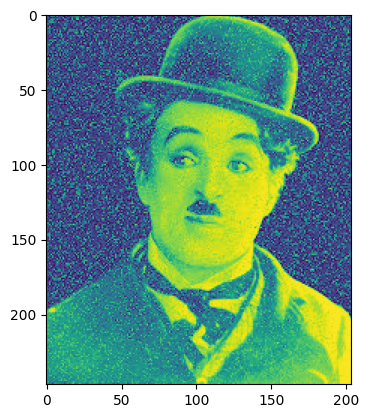

In [10]:

plt.imshow(equ)

(array([878., 264., 173., 198., 229.,   0., 250., 252.,   0., 299., 334.,
          0., 350.,   0., 361.,   0., 424.,   0., 443.,   0.,   0., 448.,
          0., 492.,   0.,   0., 492.,   0.,   0., 552.,   0.,   0., 558.,
          0.,   0., 610.,   0.,   0., 603.,   0.,   0., 620.,   0.,   0.,
        639.,   0.,   0.,   0., 633.,   0.,   0., 666.,   0.,   0., 637.,
          0.,   0., 634.,   0.,   0.,   0., 630.,   0.,   0., 641.,   0.,
          0., 611.,   0.,   0., 578.,   0.,   0., 561.,   0.,   0., 535.,
          0., 519.,   0.,   0., 470.,   0., 442.,   0.,   0., 453.,   0.,
        425.,   0., 417.,   0., 420.,   0., 372.,   0., 378.,   0., 356.,
        343.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  4

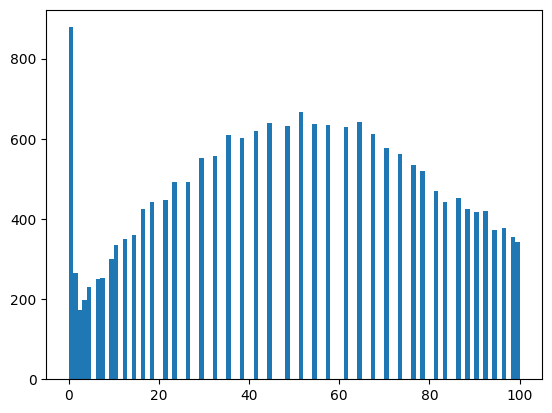

In [11]:
plt.hist(equ.flat, bins=100, range=(0,100))

In [13]:
#Histogram Equalization considers the global contrast of the image, may not give good results.
#Adaptive histogram equalization divides images into small tiles and performs hist. eq.
#Contrast limiting is also applied to minimize aplification of noise.
#Together the algorithm is called: Contrast Limited Adaptive Histogram Equalization (CLAHE)

In [14]:
# Start by creating a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
cl1 = clahe.apply(img)


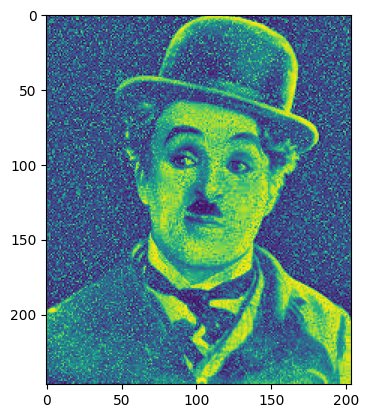

In [15]:
plt.imshow(cl1)

In [16]:

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("noisy_staff.jpg", 0)

(array([ 240.,  859.,  215.,  366.,  293.,  447.,  306.,  555.,  395.,
         641.,  730.,  467.,  843.,  508.,  873.,  634., 1027.,  676.,
        1038.,  659., 1062., 1048.,  707., 1085.,  752.,  984.,  703.,
        1003.,  643.,  927.,  872.,  567.,  825.,  503.,  724.,  535.,
         701.,  478.,  617.,  435.,  615.,  582.,  447.,  581.,  360.,
         507.,  347.,  502.,  346.,  484.,  503.,  351.,  462.,  312.,
         459.,  304.,  436.,  312.,  439.,  299.,  476.,  511.,  335.,
         509.,  306.,  530.,  328.,  510.,  374.,  504.,  494.,  358.,
         534.,  367.,  562.,  341.,  525.,  388.,  480.,  369.,  506.,
         515.,  355.,  477.,  297.,  454.,  271.,  452.,  237.,  344.,
         345.,  205.,  289.,  162.,  285.,  143.,  215.,  142.,  174.,
         128.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  5

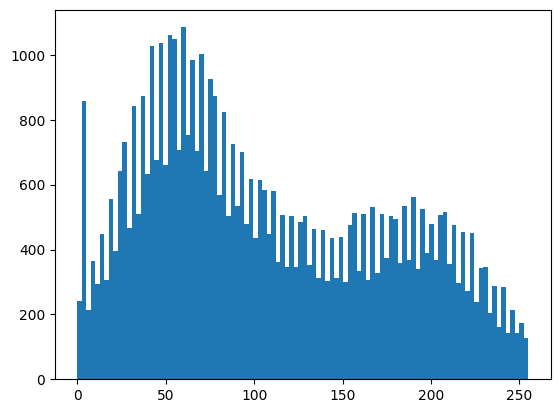

In [18]:
#Adaptive histogram equalization using CLAHE to stretch the histogram. 
#Contrast Limited Adaptive Histogram Equalization covered in the previous tutorial. 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
clahe_img = clahe.apply(img)
plt.hist(clahe_img.flat, bins =100, range=(0,255))

In [19]:
#Thresholding. Creates a uint8 image but with binary values.
#Can use this image to further segment.
#First argument is the source image, which should be a grayscale image.
#Second argument is the threshold value which is used to classify the pixel values. 
#Third argument is the maxVal which represents the value to be given to the thresholded pixel.

ret,thresh1 = cv2.threshold(clahe_img,185,150,cv2.THRESH_BINARY)  #All thresholded pixels in grey = 150
ret,thresh2 = cv2.threshold(clahe_img,185,255,cv2.THRESH_BINARY_INV) # All thresholded pixels in white


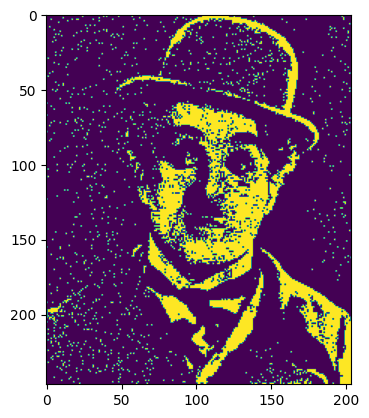

In [21]:
plt.imshow(thresh1)

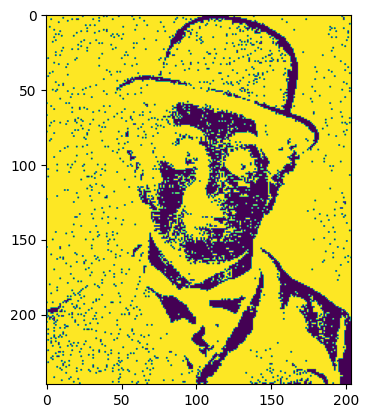

In [22]:
plt.imshow(thresh2)

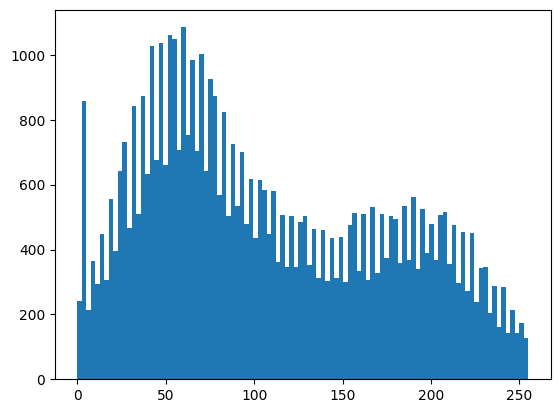

In [23]:
#OTSU Thresholding, binarization
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("noisy_staff.jpg", 0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
clahe_img = clahe.apply(img)

plt.hist(clahe_img.flat, bins =100, range=(0,255))

# binary thresholding
ret1,th1 = cv2.threshold(clahe_img,185,200,cv2.THRESH_BINARY)

# Otsu's thresholding, automatically finds the threshold point. 
#Compare wth above value provided by us (185)
ret2,th2 = cv2.threshold(clahe_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

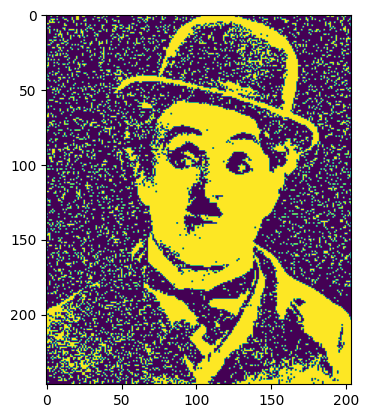

In [24]:
plt.imshow(th2)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.000e+00, 8.000e+00, 1.800e+01, 3.500e+01, 2.000e+01,
        2.700e+01, 3.400e+01, 5.700e+01, 5.300e+01, 1.510e+02, 1.460e+02,
        3.290e+02, 3.390e+02, 7.180e+02, 1.180e+03, 1.035e+03, 1.986e+03,
        1.523e+03, 2.605e+03, 1.814e+03, 2.640e+03, 1.741e+03, 2.401e+03,
        2.335e+03, 1.266e+03, 1.698e+03, 1.057e+03, 1.414e+03, 8.230e+02,
        1.093e+03, 7.240e+02, 9.320e+02, 5.490e+02, 7.610e+02, 7.310e+02,
        4.280e+02, 6.700e+02, 4.230e+02, 6.390e+02, 4.110e+02, 5.350e+02,
        3.740e+02, 5.120e+02, 4.500e+02, 2.940e+02, 4.030e+02, 2.460e+02,
        3.870e+02, 2.190e+02, 3.310e+02, 2.150e+02, 3.400e+02, 2.140e+02,
        3.010e+02, 2.910e+02, 2.170e+02, 2.920e+02, 2.140e+02, 2.910e+02,
        2.100e+02, 2.900e+02, 2.120e+02, 3.500e+02, 3.740e+02, 2.290e+02,
        3.860e+02, 2.990e+02, 4.620e+02, 3.300e+02, 5.230e+02, 3.520e+02,
        5.430e+02, 4.150e+02, 6.030e+0

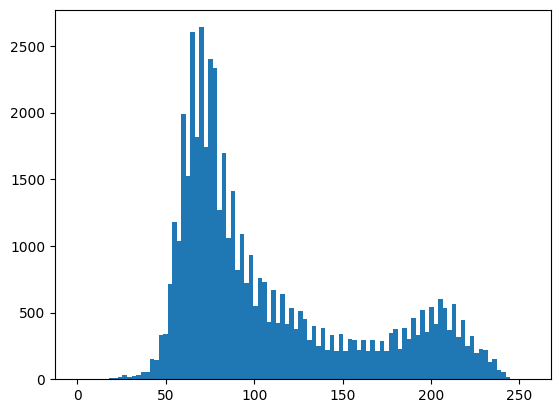

In [25]:
# If working with noisy images
# Clean up noise for better thresholding
# Otsu's thresholding after Gaussian filtering. Canuse median or NLM for beteer edge preserving

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("noisy_staff.jpg", 0)

blur = cv2.GaussianBlur(clahe_img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


plt.hist(blur.flat, bins =100, range=(0,255))

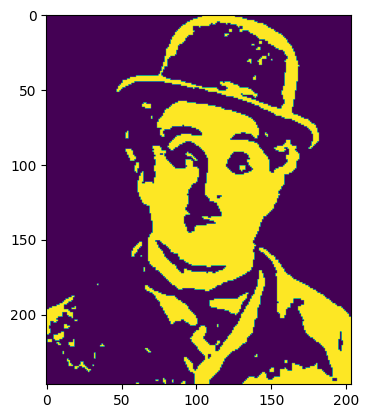

In [26]:
plt.imshow(th3)